In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/ECommerce_consumer behaviour.csv")
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [6]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,124342
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


We can see that we have null values in [ days_since_prior_order ] column. We will follow the following steps to continue EDA

In [8]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [9]:
# taking care of the null values
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True)

In [10]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [11]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


# Data Preprocessing

In [13]:
#counting unique values
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [14]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

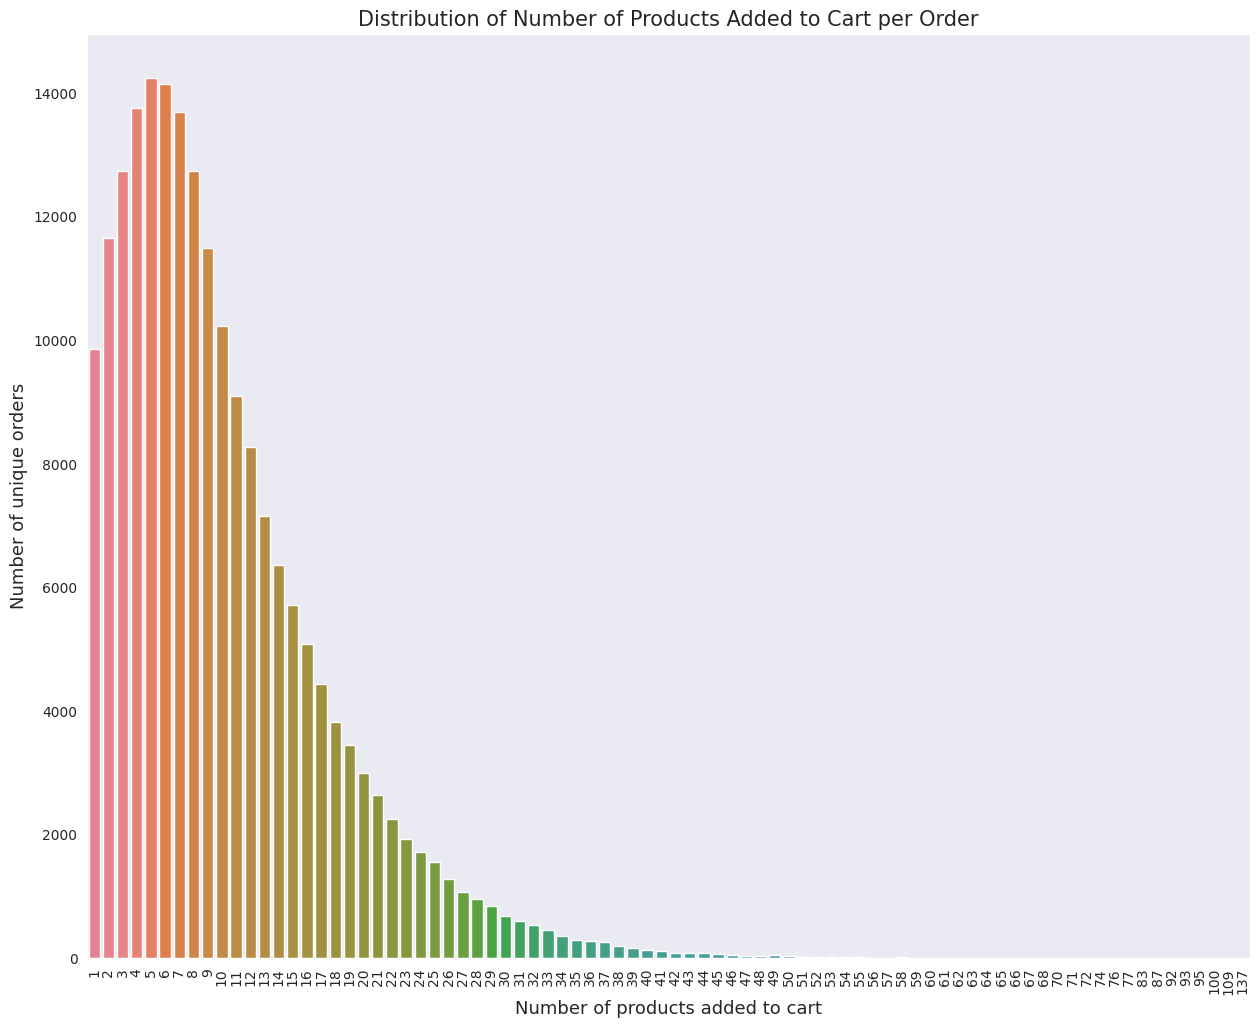

In [37]:
# Grouping values and aggregating them to visualize purchasing behaviour of consumers between add to cart and ordering

grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped["add_to_cart_order"].value_counts()

grouped = grouped.reset_index()
grouped.columns = ["num_products_added", "num_orders"]

# Plot
sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')

sns.barplot(data=grouped, x='num_products_added', y='num_orders', palette="husl")

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.title("Distribution of Number of Products Added to Cart per Order", fontsize=15)
plt.show()

From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around **4 -7 products**.

In [18]:
# Grouping values to understand which type of products consumers are reordering

grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the customers are most interested to purchase

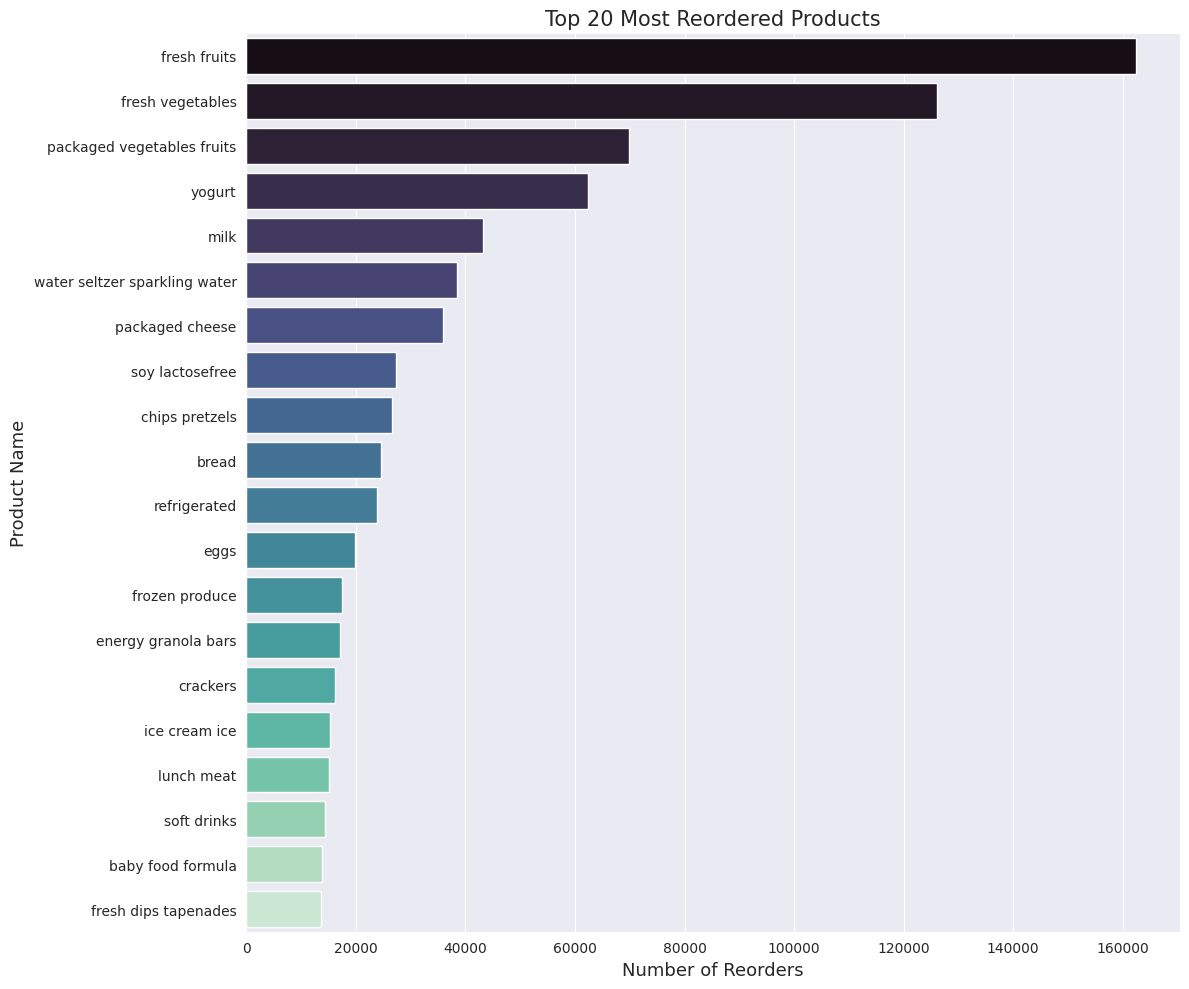

In [20]:
# Group by product name and sum the reorders
grouped = df.groupby('product_name')['reordered'].sum().sort_values(ascending=False)

# Take top 20 most reordered products
top_n = 20
grouped = grouped.head(top_n)

# Set Seaborn style
sns.set_style('darkgrid')

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x=grouped.values, y=grouped.index, palette='mako')

# Labels and title
plt.xlabel('Number of Reorders', fontsize=13)
plt.ylabel('Product Name', fontsize=13)
plt.title('Top 20 Most Reordered Products', fontsize=15)
plt.tight_layout()
plt.show()

From the above analysis we could observe that **"Fresh Fruits", "Fresh Vegetables", "Packaged Vegetables Fruits", "Yogurt" & "Packaged Cheese" are top 5 most reordered products**.

In [21]:
# Product reorder ratio

grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


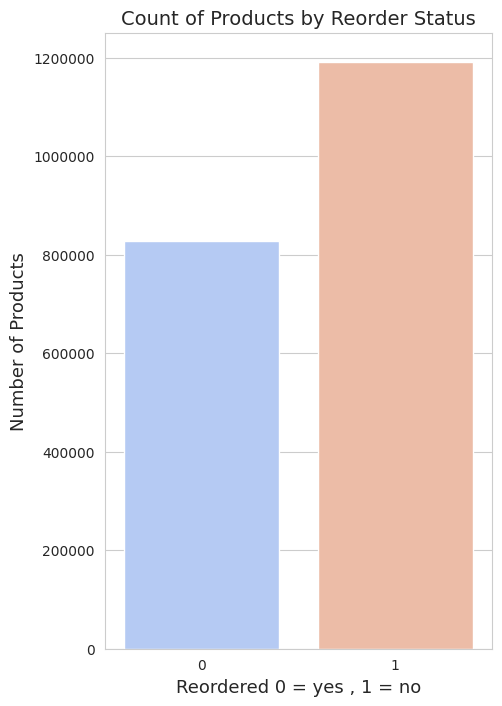

In [41]:
# Count number of products per reorder value
grouped = df.groupby('reordered')['product_id'].count()

# Reset index to create a DataFrame
grouped = grouped.reset_index()
grouped.columns = ['reordered', 'num_products']

# Set Seaborn style
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))

# Plot with correct x and y labels
sns.barplot(x='reordered', y='num_products', data=grouped, palette='coolwarm')

# Labels and formatting
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered 0 = yes , 1 = no', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Count of Products by Reorder Status', fontsize=14)
plt.show()

From the above we can see that **59 % of products were reordered** by customers.

# KMeans

In [24]:
len(df.product_id.unique())

134

In [25]:
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [26]:
X_train = clst_prd.values

# Started with 6 clusters for exploration
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# Printing the clusters that is assigned for each observation
print("The cluster are  :", kmeans.labels_)

# print inertia
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [5 0 3 ... 5 0 3]
The Inertia is : 4996240.04722422


In [27]:
# Running KMeans on a rang of clusters to find optimal number
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7543564.955387864
The inertia for : 3 Cluster is :  6284995.922099157
The inertia for : 4 Cluster is :  5731948.81579366
The inertia for : 5 Cluster is :  5281463.485593584
The inertia for : 6 Cluster is :  4996240.04722422
The inertia for : 7 Cluster is :  4763193.064231211
The inertia for : 8 Cluster is :  4625196.711183401
The inertia for : 9 Cluster is :  4465628.600668947


Text(0.5, 1.0, 'Inertia Plot per k')

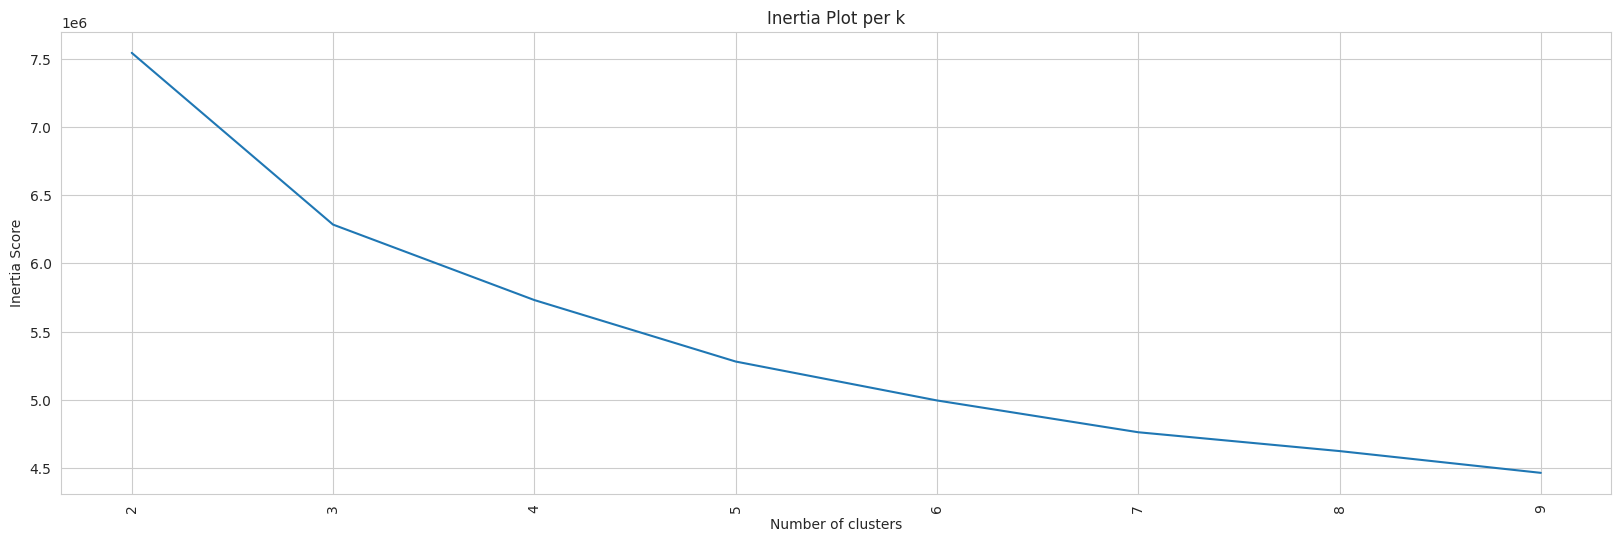

In [28]:
# Creating plot to visualize inertia ( elbow method )

fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

From the above plot we can come to an understanding that the inertia score start to drop drastically between 4 - 5 number of cluster. Thefore, I have decided to choose 5 number of cluster to grain granularity on our study

In [29]:
# Re-running KMeans on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# Predictions for new data
predictions = kmeans.predict(X_train)

# Calculationg rhe counts for clusters
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating the plot
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# Plot display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,26595,62900,1917,5846,8015


In [30]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [31]:
predictions

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

# PCA

Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 640x480 with 0 Axes>

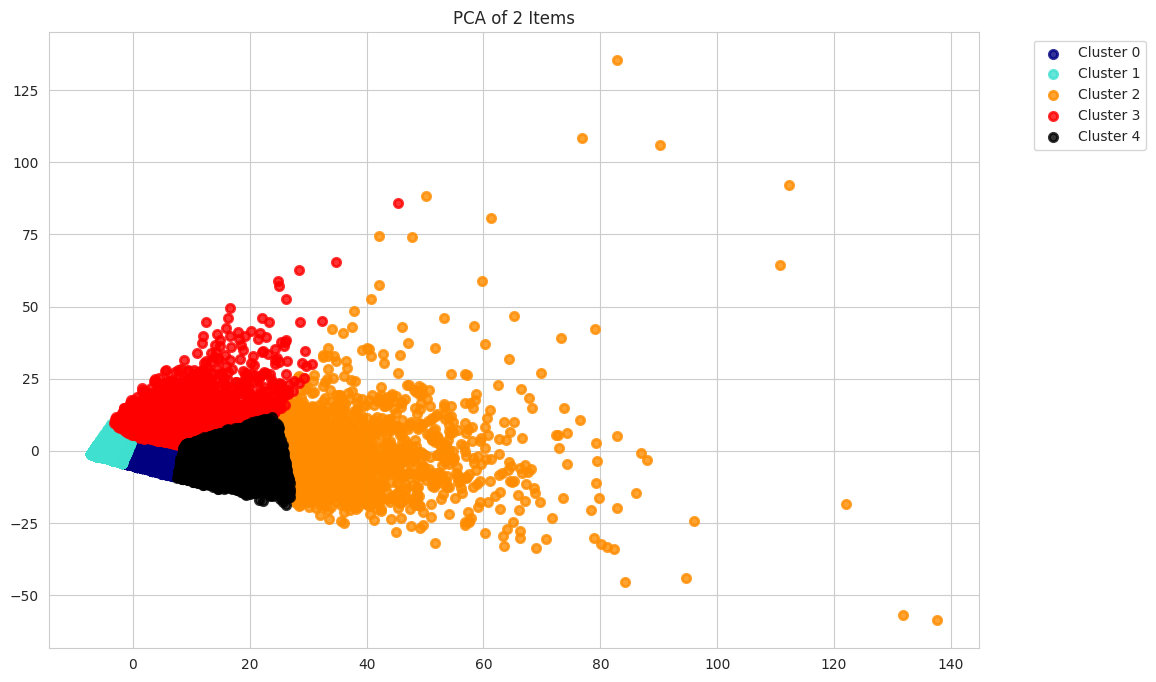

In [32]:
# Running PCA to visualize data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting data points
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()


Total Variance in our dataset is:  113.18063996195707
The 95% variance we want to have is:  107.52160796385921

Variance explain with 4 n_compononets:  95.01640082451155
Variance explain with 8 n_compononets:  105.33440036554848
Variance explain with 9 n_compononets:  106.69075586909089
Variance explain with 10 n_compononets:  107.98339847734057
Variance explain with 15 n_compononets:  112.05606051805346
Variance explain with 18 n_compononets:  113.05270297347111
Variance explain with 21 n_compononets:  113.18063996195707


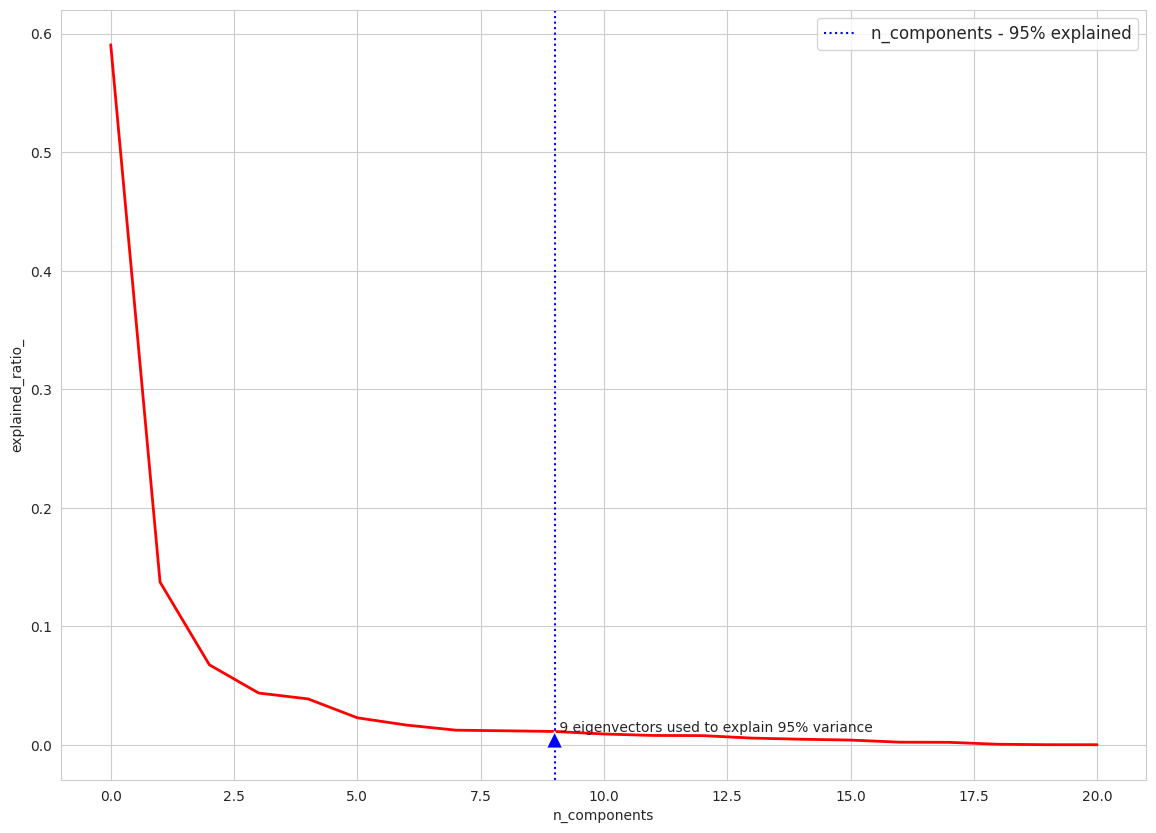

In [33]:
# Identifying the "best" number of components: Trying with dimensionality reduction and KMeans
n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# calculating the 95% variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95% variance
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# Plotting data points
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% E.V.
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# Adding arrow pointer
plt.annotate(' 9 eigenvectors used to explain 95% variance', xy=(9, pca.explained_variance_ratio_[9]),
             xytext=(9, pca.explained_variance_ratio_[9]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

From the above plot we can see that 9 eigenvectors can be used to represent 95% variance

The innertia for : 2 Clusters is: 6860375.841739806
The innertia for : 3 Clusters is: 5601880.232675806
The innertia for : 4 Clusters is: 5048873.832393101
The innertia for : 5 Clusters is: 4598466.406825824
The innertia for : 6 Clusters is: 4313256.303824791
The innertia for : 7 Clusters is: 4080430.594632874
The innertia for : 8 Clusters is: 3903941.71209582
The innertia for : 9 Clusters is: 3753944.587975729


Text(0.5, 1.0, 'Inertia Plot per k')

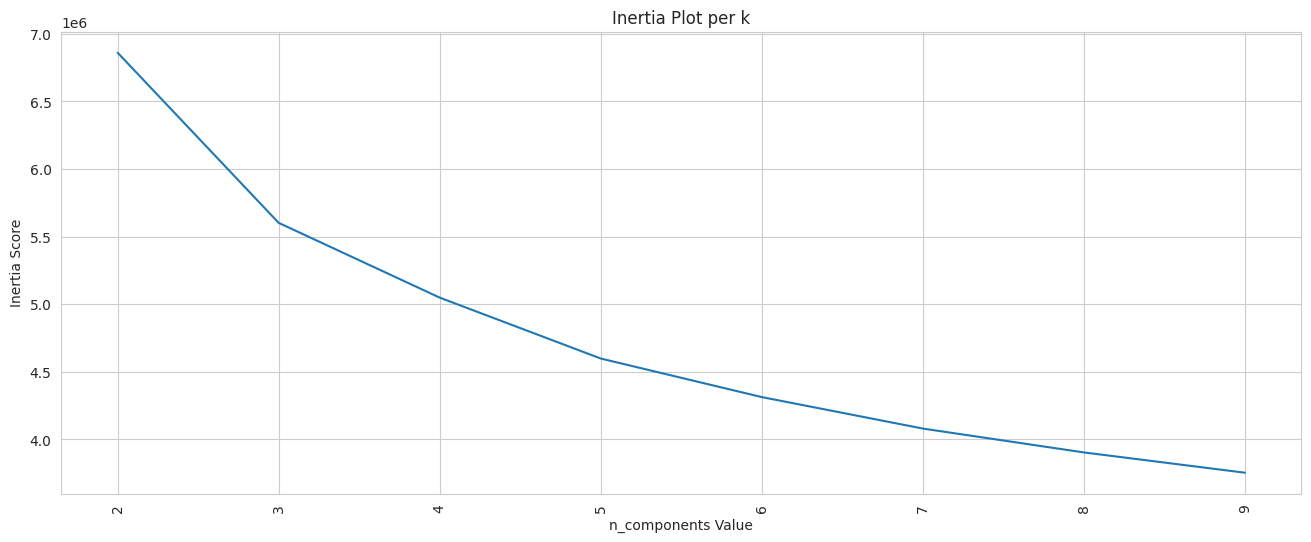

In [34]:
# Running PCA again with 9 components
pca = PCA(n_components=9, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

# Running KMeans
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating plot to visualize inertia (elbow method)
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [35]:
# Final step:

# Running PCA with 9 components
pca = PCA(n_components=9, random_state=453)
X_r = pca.fit(X).transform(X)

# Running KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_r)

clusters = kmeans.labels_

# Adding the clusters back to the original dataset
clst_prd['clusters'] = clusters

# Creating a cluster category
clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,1,Cluster 2
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,3,Cluster 4
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,1,Cluster 2
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,3,Cluster 4
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,3,Cluster 4
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,1,Cluster 2
206206,0,0,0,2,0,0,0,1,1,0,...,1,0,0,0,0,0,1,4,1,Cluster 2
